In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [149]:
# задаю параметры системы
step = 10000000
t0 = 0
t1 = 0.02
tau = (t1-t0)/step

V0 = 5
R = 10**3
C = 10**-6
L = 10**-3
w = 2 * np.pi * 3 * 10**3

# задаю начальные условия
I0 = 0
y0 = 0

In [150]:
# создаём сетку для I, y
y = np.zeros(step+1)
I = np.zeros(step+1)
t = np.zeros(step+1)

In [151]:
# устанавливаем начальные значения на сетке
y[0] = y0
I[0] = I0
t = np.array([tau * i for i in range(step+1)])

In [152]:
# выражение справа от dy/dt
def F(y, I, t):
    """
    Функция принимает три числа и по ним
    возвращает значение правой части для dy/dt.
    """
    value = -y/R/C - I/L/C + V0*np.cos(w*t)/L/C/R 
    return value

In [153]:
# один проход по решетке
def stepper(i, y, I, t, tau):
    """
    Функция принимает индекс текущей позиции на сетке
    три массива и параметр отвечающий за точность вычислений
    По ним расчитываются значения в следующих узах решетки.
    """
    y[i+1] = y[i] + tau*F(y[i], I[i], t[i])
    I[i+1] = I[i] + tau*y[i]

In [154]:
# решение задачи (полных проход по решетке)
def solver(y, I, t, tau):
    """
    Функция получает три массива, задающих сетку, число,
    отвечающее за точность шагов.
    Для сетки вызывается многократно stepper,который вычисляет
    новые значения в узлах
    """
    for i in range (1, step):
        stepper(i, y, I, t, tau)

In [155]:
# вызываем функцию решателя
solver(y, I, t, tau)

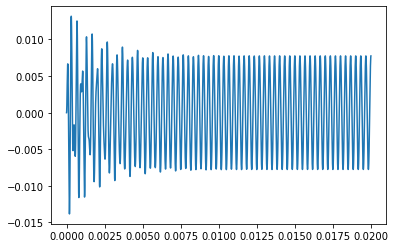

In [156]:
# выводим график зависимости тока от времени
plt.plot(t, I)

In [157]:
"""
для сравнения 
амплитуда при аналитическом решении = 0.007766
"""
max(I[-1-step//2:-1])

0.007776777287367702